# 🏡 Housing Price Predictor – ML Project

Welcome! This is my first beginner AI project where I build a machine learning model to predict housing prices using Python.

## 📌 Goal
To predict housing prices based on features like number of rooms, area, etc., using a simple regression model.

## 🛠️ Tools
- Python 3
- pandas, numpy
- matplotlib, seaborn
- scikit-learn

## 🗂️ Notebook Structure
1. Introduction  
2. Imports  
3. Load the Dataset  
4. Exploratory Data Analysis (EDA)  
   - Head, describe  
   - Plot correlations, missing values  
5. Model Training  
   - Train/test split  
   - Fit LinearRegression  
6. Evaluation  
   - Print RMSE  
   - Plot predictions vs actual  
7. Summary & Learnings

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# Load the dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Preview
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Shape and columns
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Describe statistics
df.describe()

Shape of dataset: (20640, 9)

Columns:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


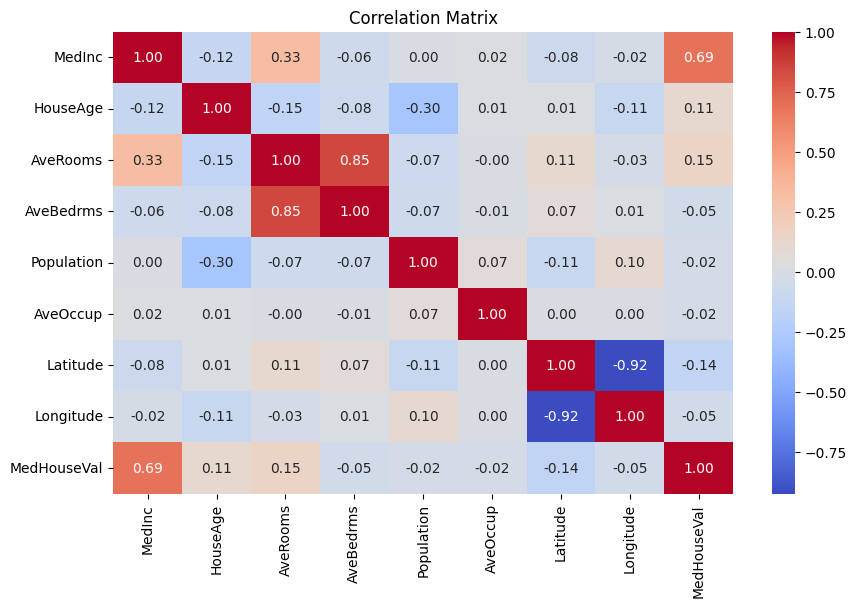

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Separate features and target
X = df.drop('MedHouseVal', axis=1)  # all features
y = df['MedHouseVal']               # target: median house value

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.75


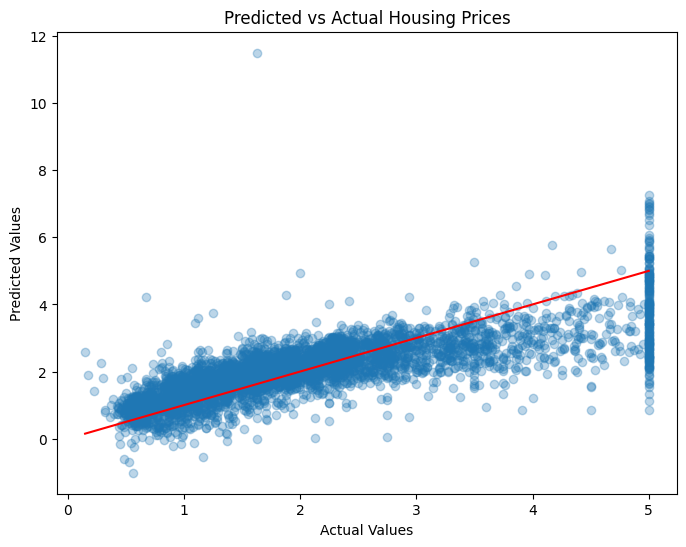

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

## 7. Evaluation Summary

- The model was trained using Linear Regression.
- Root Mean Squared Error (RMSE): **0.75**, which indicates a relatively good prediction accuracy for a basic model.
- A scatter plot of predicted vs actual values shows a reasonably strong linear relationship.

## 8. Correlation Matrix Insights

We visualized a correlation matrix to understand the relationships between the features:

- `MedInc` (Median Income) has the **strongest positive correlation** with `MedHouseVal` (Target) — correlation coefficient: **0.69**
- `AveRooms` and `AveBedrms` are highly correlated (**0.85**), which could suggest **multicollinearity**
- `Latitude` and `Longitude` are strongly negatively correlated (**-0.92**)
- Most other features have weak correlations with the target

This analysis helps identify which features are likely to be most informative for prediction and may guide future feature selection.

## 9. Summary & Learnings

🧠 **What I’ve learned in this project:**

- How to work with real datasets in Python using pandas
- How to explore data visually with seaborn & matplotlib
- How to train a regression model using scikit-learn
- How to evaluate the model with RMSE and plots
- How to interpret a correlation matrix for feature analysis
- How to document a project in Jupyter Notebook and push it to GitHub

🚀 This was my **first machine learning project**, and it laid the foundation for deeper understanding of data preprocessing, model evaluation, and future improvements such as feature engineering or model tuning.

---

🕒 *Completed on:* 2025-06-09

---

🔁 Next step: More practice with different models (after a good rest 😄)